### Public - 0,78336 ; Private - 0,79609  если использовать RandomForestClassifier()
### Public - 0,96997 ; Private - 1,0000 если использовать LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

# Преобразование бинарных категориальных признаков
train["Gender"] = train["Gender"].map({"Male": 0, "Female": 1})
test["Gender"] = test["Gender"].map({"Male": 0, "Female": 1})

train["Suicidal_Thoughts"] = train["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})
test["Suicidal_Thoughts"] = test["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})

train["Family_History"] = train["Family History of Mental Illness"].map({"No": 0, "Yes": 1})
test["Family_History"] = test["Family History of Mental Illness"].map({"No": 0, "Yes": 1})

train.drop(["Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1, inplace=True)
test.drop(["Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1, inplace=True)

# Создание признака Is_Student
train["Is_Student"] = (train["Working Professional or Student"] == "Student").astype(int)
test["Is_Student"] = (test["Working Professional or Student"] == "Student").astype(int)

# Заполнение пропусков в зависимости от статуса
train.loc[train["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0
test.loc[test["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0

train.loc[train["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0
test.loc[test["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0

# Frequency encoding для City, Profession, Degree
for col in ["City", "Profession", "Degree"]:
    freq = train[col].value_counts(normalize=True)
    train[f"{col}_freq"] = train[col].map(freq)
    test[f"{col}_freq"] = test[col].map(freq).fillna(freq.mean())

train.drop(["City", "Profession", "Degree"], axis=1, inplace=True)
test.drop(["City", "Profession", "Degree"], axis=1, inplace=True)

train.drop("Working Professional or Student", axis=1, inplace=True)
test.drop("Working Professional or Student", axis=1, inplace=True)

numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["Depression", "id"]]

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    scores = cross_val_score(pipeline, train.drop(["Depression", "id"], axis=1), train["Depression"], cv=5, scoring="f1")
    print(f"{name}: F1-score = {scores.mean():.4f}")

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])
best_model.fit(train.drop(["Depression", "id"], axis=1), train["Depression"])

predictions = best_model.predict(test.drop("id", axis=1))

submission = pd.DataFrame({"id": test["id"], "Depression": predictions})
submission.to_csv("submission.csv", index=False)
print("Файл submission.csv успешно создан!")

Logistic Regression: F1-score = 0.7264
KNN: F1-score = 0.6313
SVM: F1-score = 0.7200
Random Forest: F1-score = 0.6585
Файл submission.csv успешно создан!


## Public - 0,96997 ; Private - 0,99457
- Sleep Duration обработан как числовой признак

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

# Преобразование бинарных категориальных признаков
train["Gender"] = train["Gender"].map({"Male": 0, "Female": 1})
test["Gender"] = test["Gender"].map({"Male": 0, "Female": 1})

train["Suicidal_Thoughts"] = train["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})
test["Suicidal_Thoughts"] = test["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})

train["Family_History"] = train["Family History of Mental Illness"].map({"No": 0, "Yes": 1})
test["Family_History"] = test["Family History of Mental Illness"].map({"No": 0, "Yes": 1})

train.drop(["Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1, inplace=True)
test.drop(["Have you ever had suicidal thoughts ?", "Family History of Mental Illness"], axis=1, inplace=True)

# Создание признака Is_Student
train["Is_Student"] = (train["Working Professional or Student"] == "Student").astype(int)
test["Is_Student"] = (test["Working Professional or Student"] == "Student").astype(int)

train.loc[train["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0
test.loc[test["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0

train.loc[train["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0
test.loc[test["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0

# Frequency encoding для City, Profession, Degree
for col in ["City", "Profession", "Degree"]:
    freq = train[col].value_counts(normalize=True)
    train[f"{col}_freq"] = train[col].map(freq)
    test[f"{col}_freq"] = test[col].map(freq).fillna(freq.mean())

train.drop(["City", "Profession", "Degree"], axis=1, inplace=True)
test.drop(["City", "Profession", "Degree"], axis=1, inplace=True)

train.drop("Working Professional or Student", axis=1, inplace=True)
test.drop("Working Professional or Student", axis=1, inplace=True)

# Обработка столбца Sleep Duration как числового
def range_to_mean(range_str):
    range_str = range_str.replace(' hours', '').strip()
    if '-' in range_str:
        start, end = map(float, range_str.split('-'))
        return (start + end) / 2
    elif range_str == 'Less than 5':
        return 4.0 
    elif range_str == 'More than 8':
        return 9.0  
    else:
        return float(range_str)

train["Sleep Duration"] = train["Sleep Duration"].apply(range_to_mean)
test["Sleep Duration"] = test["Sleep Duration"].apply(range_to_mean)

numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["Depression", "id"]]

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

if "Sleep Duration" not in numerical_cols:
    numerical_cols.append("Sleep Duration")
if "Sleep Duration" in categorical_cols:
    categorical_cols.remove("Sleep Duration")

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Кросс-валидация для каждой модели
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    scores = cross_val_score(pipeline, train.drop(["Depression", "id"], axis=1), train["Depression"], cv=5, scoring="f1")
    print(f"{name}: F1-score = {scores.mean():.4f}")

best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])
best_model.fit(train.drop(["Depression", "id"], axis=1), train["Depression"])

predictions = best_model.predict(test.drop("id", axis=1))

submission = pd.DataFrame({"id": test["id"], "Depression": predictions})
submission.to_csv("submission.csv", index=False)
print("Файл submission.csv успешно создан!")

Logistic Regression: F1-score = 0.9620
KNN: F1-score = 0.7318
SVM: F1-score = 0.8749
Random Forest: F1-score = 0.8086
Файл submission.csv успешно создан!


## Public - 0,97071 ; Private - 1,00000
- Функция для порядкового кодирования Dietary Habits
- новый признак Work_Study_Stress
- Функция для категоризации возраста
- Подбор гиперпараметров





In [10]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

def process_sleep_duration(df):
    def range_to_mean(range_str):
        range_str = range_str.replace(' hours', '').strip()
        if '-' in range_str:
            start, end = map(float, range_str.split('-'))
            return (start + end) / 2, start, end
        elif range_str == 'Less than 5':
            return 4.0, 4.0, 4.0
        elif range_str == 'More than 8':
            return 9.0, 9.0, 9.0
        else:
            return float(range_str), float(range_str), float(range_str)
    
    df[['Sleep_Mean', 'Sleep_Min', 'Sleep_Max']] = df['Sleep Duration'].apply(
        lambda x: pd.Series(range_to_mean(x))
    )
    return df.drop('Sleep Duration', axis=1)

def process_dietary_habits(df):
    dietary_order = [['Unhealthy', 'Moderate', 'Healthy']]
    encoder = OrdinalEncoder(categories=dietary_order)
    df['Dietary_Habits_Ordinal'] = encoder.fit_transform(df[['Dietary Habits']])
    return df

def create_interaction_features(df):
    df['Work_Study_Stress'] = df['Work/Study Hours'] * (
        df['Academic Pressure'].fillna(0) + df['Work Pressure'].fillna(0)
    )
    return df

# Функция для категоризации возраста
def bin_age(df):
    bins = [0, 25, 35, 45, 60, 100]
    labels = ['Молодой', 'Молодой_взрослый', 'Взрослый', 'Средний_возраст', 'Пожилой']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
    return df

def preprocess_data(train, test):
    train = train.drop("Name", axis=1)
    test = test.drop("Name", axis=1)
    
    # Бинарное кодирование
    for col, mapping in [
        ("Gender", {"Male": 0, "Female": 1}),
        ("Have you ever had suicidal thoughts ?", {"No": 0, "Yes": 1}),
        ("Family History of Mental Illness", {"No": 0, "Yes": 1})
    ]:
        train[col] = train[col].map(mapping)
        test[col] = test[col].map(mapping)
    
    train = train.rename(columns={
        "Have you ever had suicidal thoughts ?": "Suicidal_Thoughts",
        "Family History of Mental Illness": "Family_History"
    })
    test = test.rename(columns={
        "Have you ever had suicidal thoughts ?": "Suicidal_Thoughts",
        "Family History of Mental Illness": "Family_History"
    })
    
    train["Is_Student"] = (train["Working Professional or Student"] == "Student").astype(int)
    test["Is_Student"] = (test["Working Professional or Student"] == "Student").astype(int)
    
    train.loc[train["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0
    test.loc[test["Is_Student"] == 1, ["Work Pressure", "Job Satisfaction"]] = 0
    
    train.loc[train["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0
    test.loc[test["Is_Student"] == 0, ["Academic Pressure", "CGPA", "Study Satisfaction"]] = 0
    
    # Частотное кодирование для City, Profession, Degree
    for col in ["City", "Profession", "Degree"]:
        freq = train[col].value_counts()
        rare_categories = freq[freq < 10].index
        train[col] = train[col].replace(rare_categories, 'Другое')
        test[col] = test[col].replace(rare_categories, 'Другое')
        
        freq = train[col].value_counts(normalize=True)
        train[f"{col}_freq"] = train[col].map(freq)
        test[f"{col}_freq"] = test[col].map(freq).fillna(freq.mean())
    
    train = train.drop(["City", "Profession", "Degree"], axis=1)
    test = test.drop(["City", "Profession", "Degree"], axis=1)
    
    train = train.drop("Working Professional or Student", axis=1)
    test = test.drop("Working Professional or Student", axis=1)
    
    train = process_sleep_duration(train)
    test = process_sleep_duration(test)
    
    train = process_dietary_habits(train)
    test = process_dietary_habits(test)
    
    train = create_interaction_features(train)
    test = create_interaction_features(test)
    
    train = bin_age(train)
    test = bin_age(test)
    
    return train, test

train, test = preprocess_data(train, test)

numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["Depression", "id"]]

categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num Bitesize', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = LogisticRegression()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Подбор гиперпараметров
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__penalty': ['l2']  # l1 только для liblinear
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(train.drop(["Depression", "id"], axis=1), train["Depression"])

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая F1-оценка: {grid_search.best_score_:.4f}")

# Оценка модели
scoring = {'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}
scores = cross_validate(
    grid_search.best_estimator_,
    train.drop(["Depression", "id"], axis=1),
    train["Depression"],
    cv=skf,
    scoring=scoring,
    return_train_score=False
)

print("Логистическая регрессия:")
print(f"  F1-оценка = {scores['test_f1'].mean():.4f} (+/- {scores['test_f1'].std() * 2:.4f})")
print(f"  Точность = {scores['test_precision'].mean():.4f}")
print(f"  Полнота = {scores['test_recall'].mean():.4f}\n")

best_model = grid_search.best_estimator_
best_model.fit(train.drop(["Depression", "id"], axis=1), train["Depression"])

predictions = best_model.predict(test.drop("id", axis=1))

submission = pd.DataFrame({"id": test["id"], "Depression": predictions})
submission.to_csv("submission.csv", index=False)
print("Файл submission.csv успешно создан!")

Лучшие параметры: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Лучшая F1-оценка: 0.9656


C:\Users\maksc\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maksc\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Логистическая регрессия:
  F1-оценка = 0.9656 (+/- 0.0161)
  Точность = 0.9704
  Полнота = 0.9613

Файл submission.csv успешно создан!


C:\Users\maksc\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


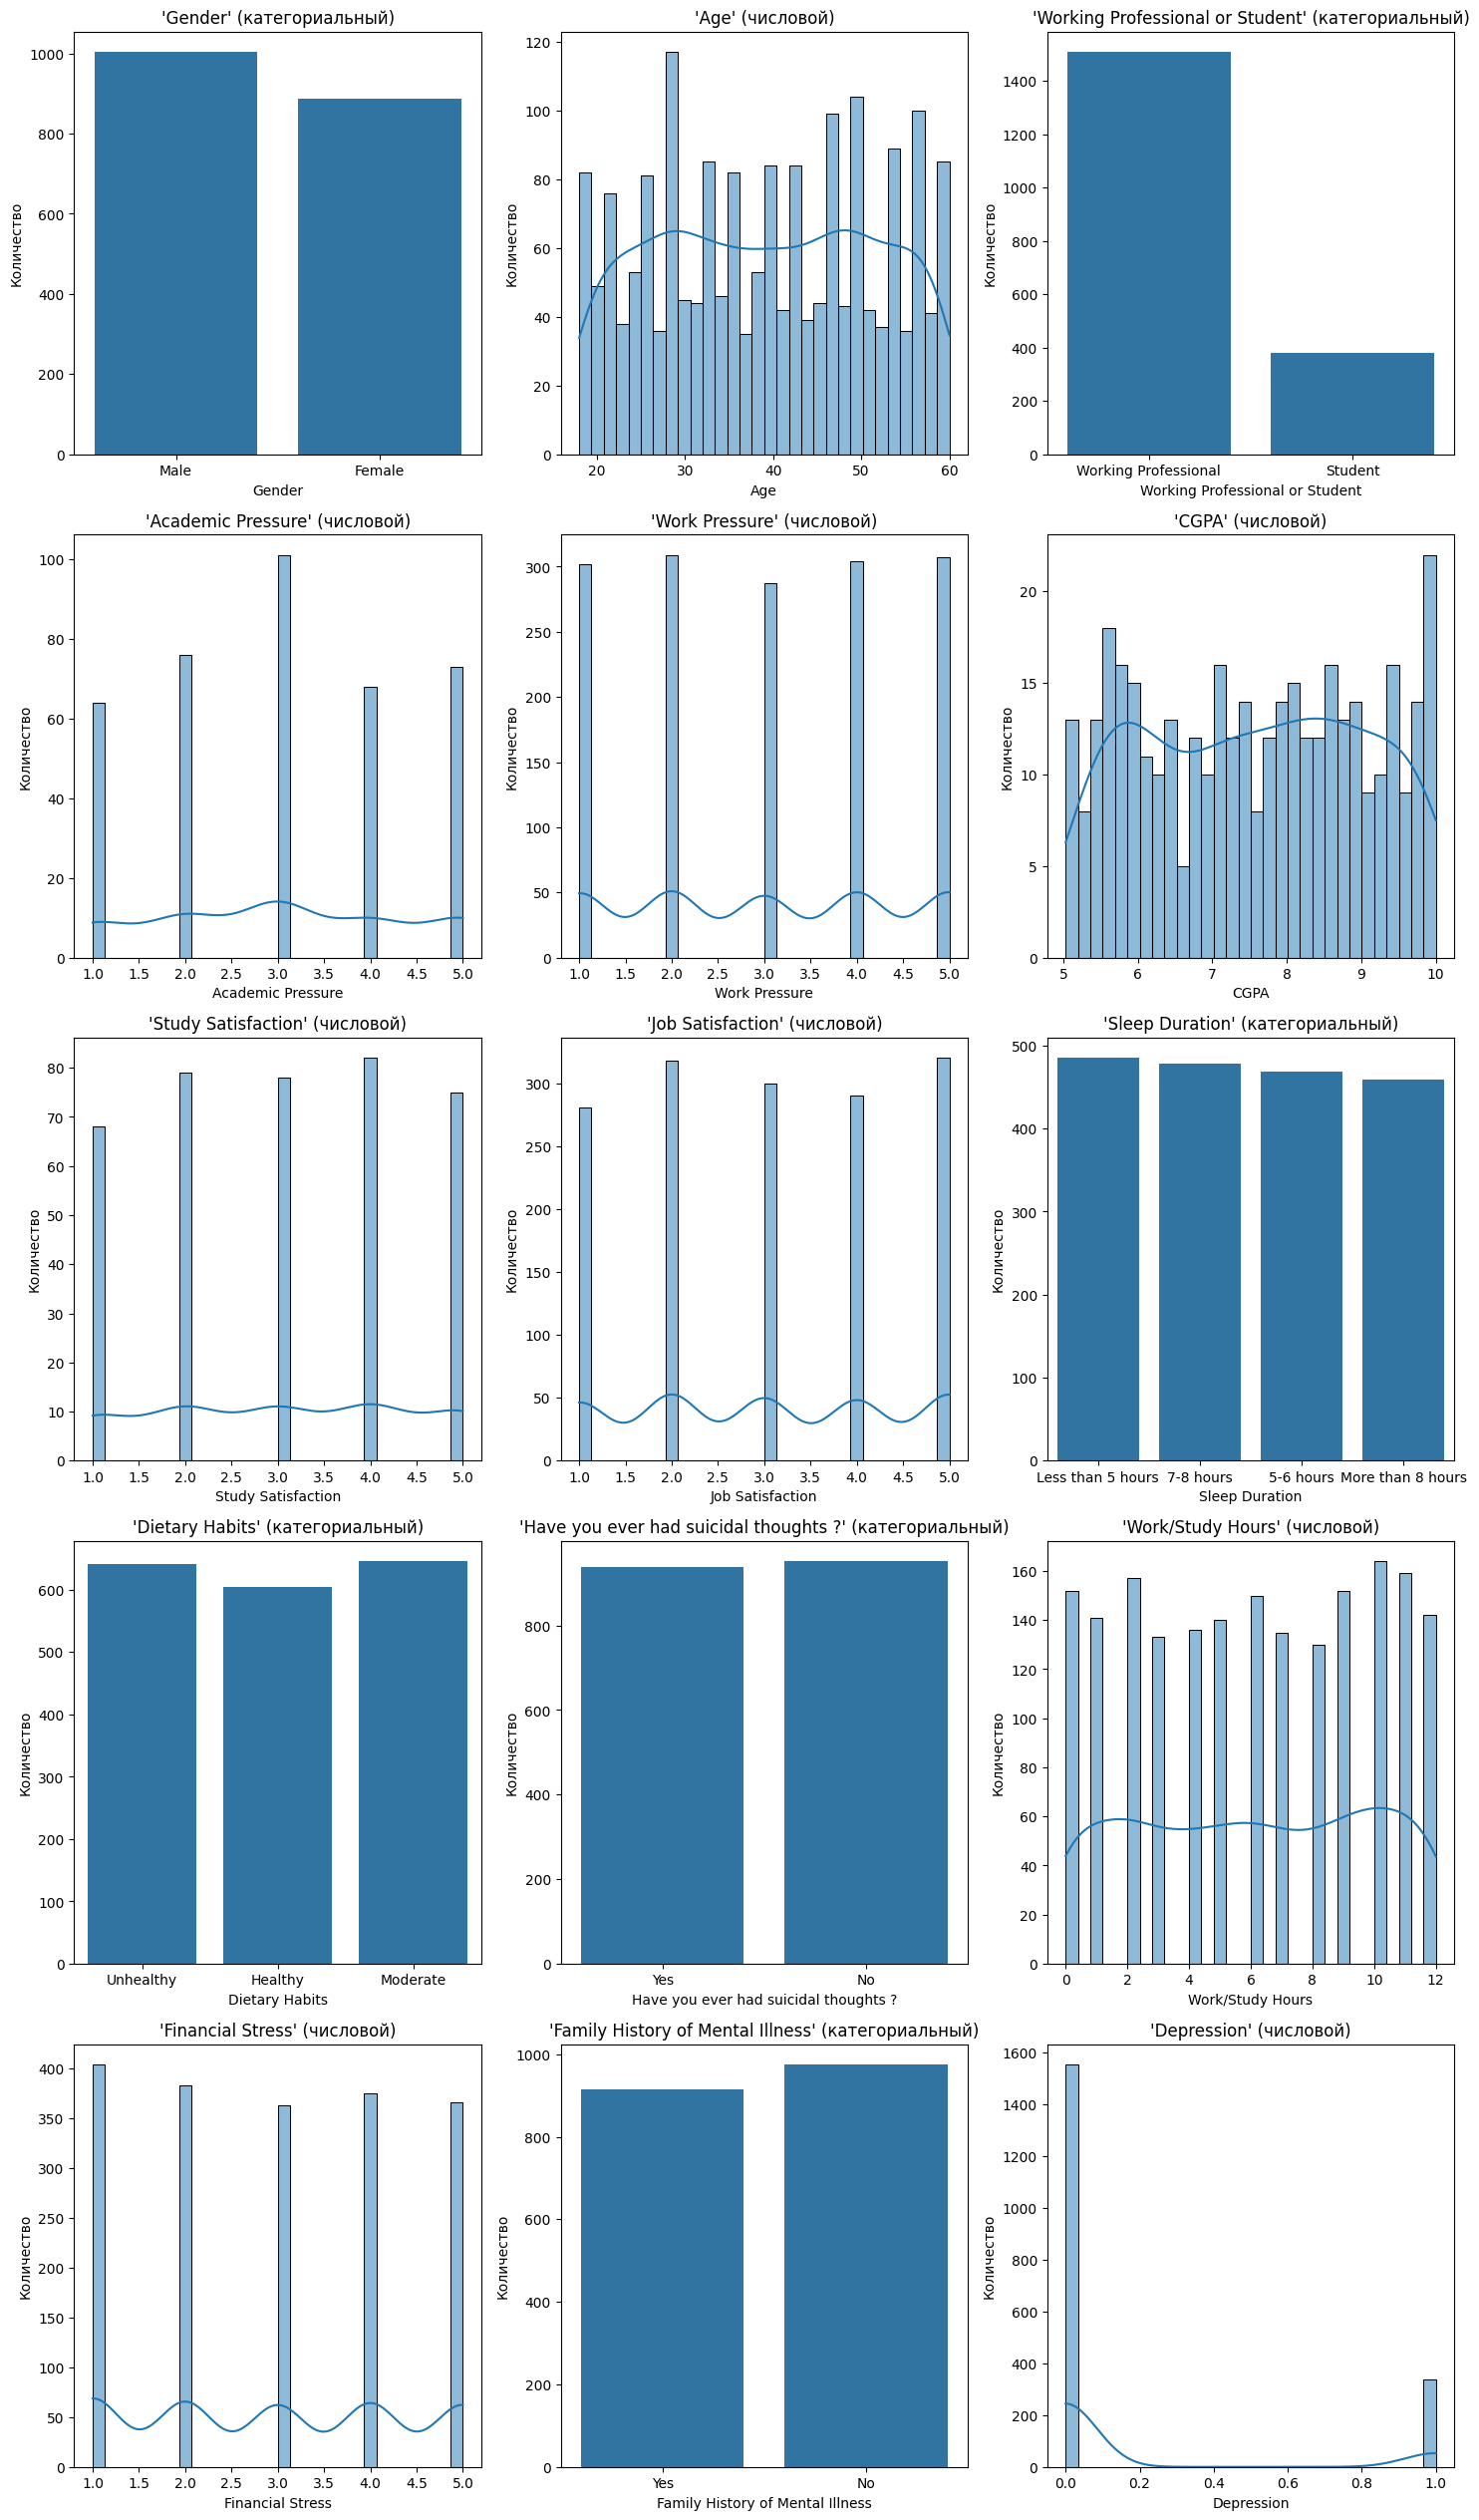

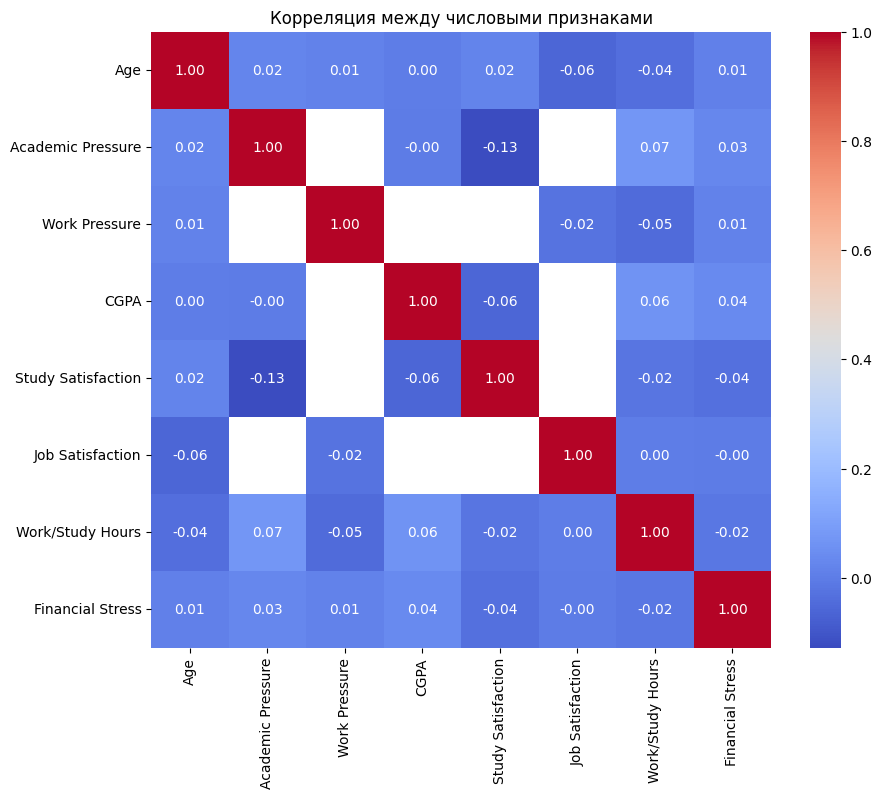

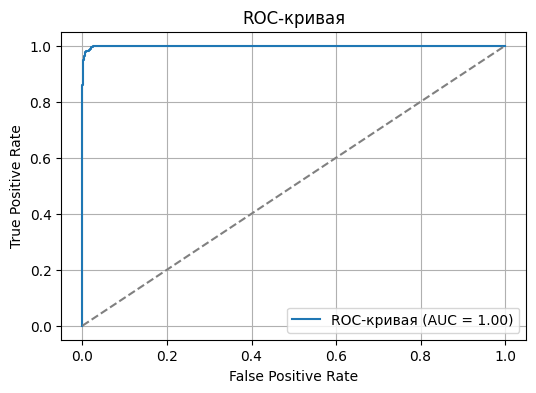

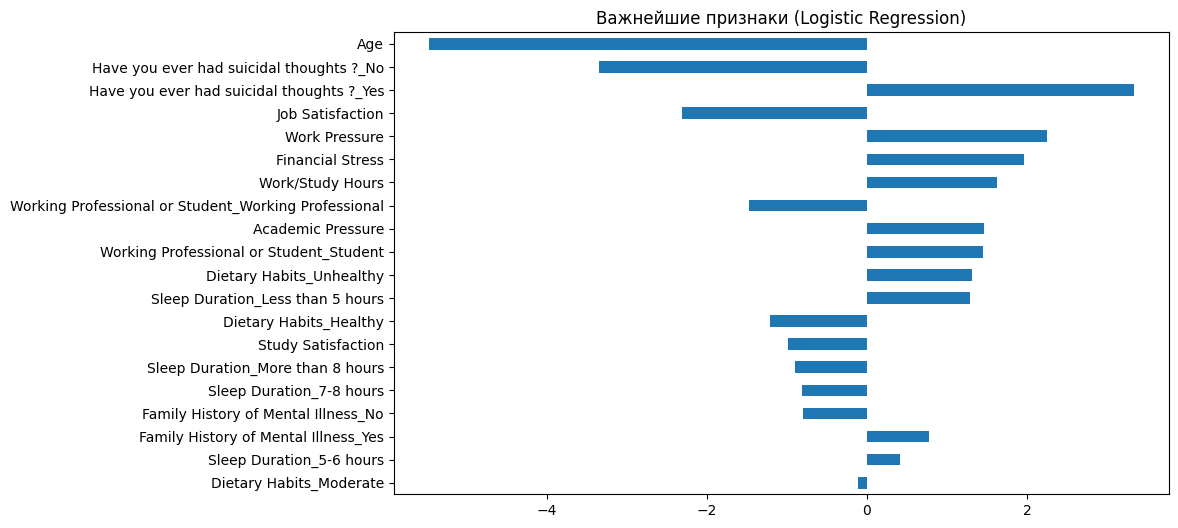

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')

columns_to_drop = ['Name', 'City', 'Profession', 'id', 'Degree']
train_data = train_data.drop(columns=columns_to_drop, axis=1)

X = train_data.drop(columns=['Depression'])
y = train_data['Depression']

num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# 1. Распределение классов
X_vis = X.copy()
X_vis['Depression'] = y

num_plots = len(X_vis.columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, 5 * (num_plots // 3 + 1)))
axes = axes.flatten()

for i, feature in enumerate(X_vis.columns):
    ax = axes[i]
    if X_vis[feature].dtype in ['int64', 'float64']:
        sns.histplot(X_vis[feature], kde=True, bins=30, ax=ax)
        ax.set_title(f"'{feature}' (числовой)")
    else:
        sns.countplot(x=X_vis[feature], ax=ax)
        ax.set_title(f"'{feature}' (категориальный)")
    
    ax.set_xlabel(feature)
    ax.set_ylabel("Количество")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. Корреляция числовых признаков
plt.figure(figsize=(10, 8))
corr_matrix = X[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между числовыми признаками")
plt.show()

# 3. ROC-кривая
num_pipeline = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[ 
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

model_pipeline = Pipeline(steps=[ 
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

y_proba = cross_val_predict(model_pipeline, X, y, cv=5, method="predict_proba")[:, 1]

if len(np.unique(y)) == 2:
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-кривая")
    plt.legend()
    plt.grid()
    plt.show()

# 4. Важность признаков (Logistic Regression)
model_pipeline.fit(X, y)

best_model = model_pipeline
feature_names_num = num_features
feature_names_cat = best_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features)

feature_names_all = np.concatenate([feature_names_num, feature_names_cat])

coefficients = best_model.named_steps['classifier'].coef_[0]
feature_importance = pd.Series(coefficients, index=feature_names_all).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
feature_importance[:20].plot(kind='barh')
plt.title("Важнейшие признаки (Logistic Regression)")
plt.gca().invert_yaxis()
plt.show()